In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,NaN,NaN,NaN,0.5,0.0,NaN,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,NaN,0.44,NaN,NaN,0.5,0.0,NaN,0.22
4,0.42,NaN,NaN,NaN,0.5,0.0,0.48,NaN
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	111
float64		column 2	185
float64		column 3	259
float64		column 4	222
float64		column 5	111
float64		column 6	0
float64		column 7	185
float64		column 8	111


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1373.000000,1299.000000,1225.000000,1262.000000,1373.000000,1484.000000,1299.000000,1373.000000
mean,0.499599,0.499738,0.498490,0.260990,0.504370,0.007500,0.499931,0.275157
std,0.137238,0.122656,0.086783,0.137585,0.046556,0.075683,0.057014,0.106442
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.010000
25%,0.410000,0.420000,0.450000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,0.940000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

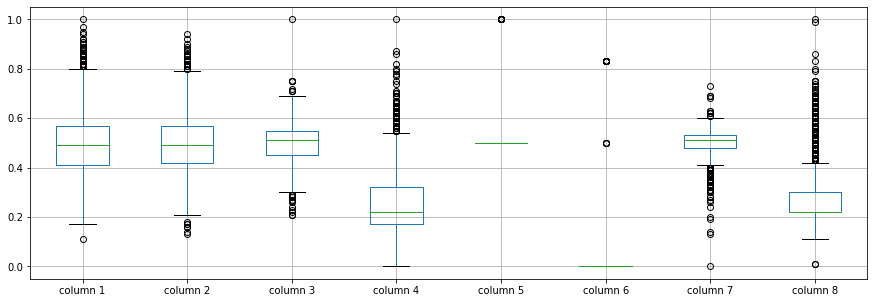

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499599
column 2    0.499738
column 3    0.498490
column 4    0.260990
column 5    0.504370
column 6    0.007500
column 7    0.499931
column 8    0.275157
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.576652,-0.174488,0.159064,0.032414,0.011893,0.057524,-0.129928
column 2,0.576652,1.000000,-0.240416,0.142751,0.034860,-0.007129,0.069716,-0.115622
column 3,-0.174488,-0.240416,1.000000,0.039986,-0.021378,0.003884,-0.151100,-0.008353
column 4,0.159064,0.142751,0.039986,1.000000,0.020928,-0.029965,-0.060804,-0.032644
column 5,0.032414,0.034860,-0.021378,0.020928,1.000000,-0.009027,0.030012,0.006161
column 6,0.011893,-0.007129,0.003884,-0.029965,-0.009027,1.000000,0.017329,-0.033469
column 7,0.057524,0.069716,-0.151100,-0.060804,0.030012,0.017329,1.000000,0.070361
column 8,-0.129928,-0.115622,-0.008353,-0.032644,0.006161,-0.033469,0.070361,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+40,8+40+40,8+40+40+40,8+40+40+40+40,8+40+40+40+40+40,8+40+40+40+40+40+40,8+40+40+40+40+40,8+40+40+40+40,8+40+40+40,8+40+40,8+40,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.607892322799434
Epoch: 1 , loss: 2.178715254949487
Epoch: 2 , loss: 2.0320195154003473
Epoch: 3 , loss: 1.8951682448387146
Epoch: 4 , loss: 1.7728841317736583
Epoch: 5 , loss: 1.7111863442089246
Epoch: 6 , loss: 1.6180302267489226
Epoch: 7 , loss: 1.560955884663955
Epoch: 8 , loss: 1.4864650031794673
Epoch: 9 , loss: 1.4335685838823733
Epoch: 10 , loss: 1.379720696936483
Epoch: 11 , loss: 1.3434225780808406
Epoch: 12 , loss: 1.30563610986523
Epoch: 13 , loss: 1.2778418744387834
Epoch: 14 , loss: 1.2330727972414182
Epoch: 15 , loss: 1.212905681003695
Epoch: 16 , loss: 1.183177631834279
Epoch: 17 , loss: 1.1839530830797942
Epoch: 18 , loss: 1.140844582863476
Epoch: 19 , loss: 1.1113031713858894
Epoch: 20 , loss: 1.1218736515096996
Epoch: 21 , loss: 1.1001897033142007
Epoch: 22 , loss: 1.0917805141728858
Epoch: 23 , loss: 1.0620310397251793
Epoch: 24 , loss: 1.0607211635164593
Epoch: 25 , loss: 1.0491351

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.475602
column 2    0.440000
column 3    0.480000
column 4    0.241098
column 5    0.469554
column 6    0.000000
column 7    0.467970
column 8    0.220000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,-0.164254,0.018366,-0.016389,0.0,0.0,-0.023318,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,-0.065681,0.000000,-0.061093,0.137930,0.0,0.0,-0.025201,0.000000
4,0.000000,0.155141,0.107955,-0.237047,0.0,0.0,0.000000,0.098483
...,...,...,...,...,...,...,...,...
1479,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1480,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1481,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1482,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.343290709629905, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.1139193743569393

In [18]:
new_df.iloc[66,:]

column 1    0.576821
column 2    0.490000
column 3    0.576522
column 4    0.291459
column 5    0.500000
column 6    0.000000
column 7    0.583718
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.610000,0.470000,0.130000,0.5,0.0,0.480000,0.220000
1,0.430000,0.505746,0.498366,0.253611,0.5,0.0,0.506682,0.220000
2,0.640000,0.620000,0.490000,0.150000,0.5,0.0,0.530000,0.220000
3,0.514319,0.440000,0.508907,0.267930,0.5,0.0,0.514799,0.220000
4,0.420000,0.595141,0.587955,0.302953,0.5,0.0,0.480000,0.318483
...,...,...,...,...,...,...,...,...
1479,0.820000,0.630000,0.470000,0.180000,0.5,0.0,0.500000,0.220000
1480,0.350000,0.290000,0.460000,0.140000,0.5,0.0,0.540000,0.660000
1481,0.410000,0.470000,0.500000,0.140000,0.5,0.0,0.530000,0.370000
1482,0.510000,0.450000,0.620000,0.250000,0.5,0.0,0.590000,0.220000


In [20]:
imputations[-1].to_excel("Yeast_AW_10(imp).xlsx", index=False, header=False)